## Smart Lead Scoring Engine  

Can you identify the potential leads for a D2C startup?

### Problem Statement  

A D2C startup develops products using cutting edge technologies like Web 3.0. Over the past few months, the company has started multiple marketing campaigns offline and digital both. As a result, the users have started showing interest in the product on the website. These users with intent to buy product(s) are generally known as leads (Potential Customers).   

Leads are captured in 2 ways - Directly and Indirectly.   

Direct leads are captured via forms embedded in the website while indirect leads are captured based on certain activity of a user on the platform such as time spent on the website, number of user sessions, etc.  
Now, the marketing & sales team wants to identify the leads who are more likely to buy the product so that the sales team can manage their bandwidth efficiently by targeting these potential leads and increase the sales in a shorter span of time.  

Now, as a data scientist, your task at hand is to predict the propensity to buy a product based on the user's past activities and user level information.  

### About Dataset

You are provided with the leads data of last year containing both direct and indirect leads. Each lead provides information about their activity on the platform, signup information and campaign information. Based on his past activity on the platform, you need to build the predictive model to classify if the user would buy the product in the next 3 months or not.  

#### Data Dictionary  

You are provided with 3 files - train.csv, test.csv and sample_submission.csv  

**Training set**
train.csv contains the leads information of last 1 year from Jan 2021 to Dec 2021. And also the target variable indicating if the user will buy the product in next 3 months or not   
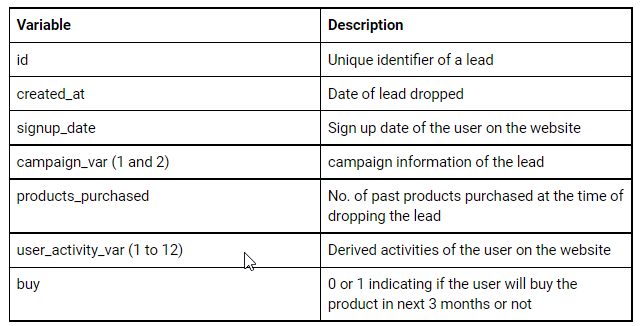

**Test set**
test.csv contains the leads information of the current year from Jan 2022 to March 2022. You need to predict if the lead will buy the product in next 3 months or not.
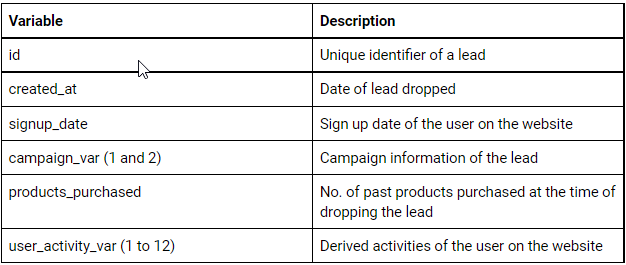  

#### Evaluation metric
The evaluation metric for this hackathon would be **F1 Score of Class 1.**

In [1]:
# Importing necessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Reading and Underastanding data

In [2]:
# Read train and test data
df_train = pd.read_csv("train_wn75k28.csv")
df_test = pd.read_csv("test_Wf7sxXF.csv")

# Top 5 datapoints for train
df_train.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [3]:
# Top 5 datapoints for train
df_test.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# Lets check the shape of the datasets
print('The shape of train dataset is : ',df_train.shape)
print('The shape of test dataset is : ',df_test.shape)

The shape of train dataset is :  (39161, 19)
The shape of test dataset is :  (13184, 18)


In [5]:
# Check if duplicate records are in dataset
print('The duplicate datapoints in train: ', df_train.duplicated().sum())
print('The duplicate datapoints in test: ', df_test.duplicated().sum())

The duplicate datapoints in train:  0
The duplicate datapoints in test:  0


In [6]:
# Checking information on train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [7]:
# Checking information on test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184 entries, 0 to 13183
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    13184 non-null  int64  
 1   created_at            13184 non-null  object 
 2   campaign_var_1        13184 non-null  int64  
 3   campaign_var_2        13184 non-null  int64  
 4   products_purchased    5048 non-null   float64
 5   signup_date           6535 non-null   object 
 6   user_activity_var_1   13184 non-null  int64  
 7   user_activity_var_2   13184 non-null  int64  
 8   user_activity_var_3   13184 non-null  int64  
 9   user_activity_var_4   13184 non-null  int64  
 10  user_activity_var_5   13184 non-null  int64  
 11  user_activity_var_6   13184 non-null  int64  
 12  user_activity_var_7   13184 non-null  int64  
 13  user_activity_var_8   13184 non-null  int64  
 14  user_activity_var_9   13184 non-null  int64  
 15  user_activity_var_1

The date columns are object. So lets convert them to datetime datatype.

In [8]:
# Datatype conversion for train
df_train['created_at'] = pd.to_datetime(df_train['created_at'])
df_train['signup_date'] = pd.to_datetime(df_train['signup_date'])

# Datatype conversion for test 
df_test['created_at'] = pd.to_datetime(df_test['created_at'])
df_test['signup_date'] = pd.to_datetime(df_test['signup_date'])

In [9]:
# Lets check the datatype
print("Datatype verification for train:\n")
print(df_train.dtypes, '\n')
print("Datatype verification for test:\n")
print(df_train.dtypes)

Datatype verification for train:

id                               int64
created_at              datetime64[ns]
campaign_var_1                   int64
campaign_var_2                   int64
products_purchased             float64
signup_date             datetime64[ns]
user_activity_var_1              int64
user_activity_var_2              int64
user_activity_var_3              int64
user_activity_var_4              int64
user_activity_var_5              int64
user_activity_var_6              int64
user_activity_var_7              int64
user_activity_var_8              int64
user_activity_var_9              int64
user_activity_var_10             int64
user_activity_var_11             int64
user_activity_var_12             int64
buy                              int64
dtype: object 

Datatype verification for test:

id                               int64
created_at              datetime64[ns]
campaign_var_1                   int64
campaign_var_2                   int64
products_purchased  

In [10]:
# Statistical summary for train
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,39161.0,19581.000000,11304.951283,1.0,9791.0,19581.0,29371.0,39161.0
campaign_var_1,39161.0,6.523812,3.472944,1.0,4.0,6.0,9.0,16.0
campaign_var_2,39161.0,6.452746,2.614296,1.0,5.0,6.0,8.0,15.0
products_purchased,18250.0,2.154137,0.779815,1.0,2.0,2.0,3.0,4.0
user_activity_var_1,39161.0,0.400092,0.509194,0.0,0.0,0.0,1.0,3.0
user_activity_var_2,39161.0,0.006716,0.081676,0.0,0.0,0.0,0.0,1.0
user_activity_var_3,39161.0,0.102832,0.303743,0.0,0.0,0.0,0.0,1.0
user_activity_var_4,39161.0,0.011465,0.106463,0.0,0.0,0.0,0.0,1.0
user_activity_var_5,39161.0,0.151503,0.359681,0.0,0.0,0.0,0.0,2.0
user_activity_var_6,39161.0,0.499834,0.558166,0.0,0.0,0.0,1.0,3.0


In [11]:
# Statistical summary for test
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,13184.0,45753.500000,3806.037309,39162.0,42457.75,45753.5,49049.25,52345.0
campaign_var_1,13184.0,7.724439,3.599981,1.0,5.00,8.0,10.00,16.0
campaign_var_2,13184.0,7.943416,2.687832,1.0,6.00,8.0,10.00,15.0
products_purchased,5048.0,2.108954,0.783483,1.0,2.00,2.0,3.00,4.0
user_activity_var_1,13184.0,0.386681,0.505653,0.0,0.00,0.0,1.00,3.0
user_activity_var_2,13184.0,0.004248,0.065037,0.0,0.00,0.0,0.00,1.0
user_activity_var_3,13184.0,0.103307,0.304371,0.0,0.00,0.0,0.00,1.0
user_activity_var_4,13184.0,0.007130,0.084140,0.0,0.00,0.0,0.00,1.0
user_activity_var_5,13184.0,0.153064,0.360695,0.0,0.00,0.0,0.00,2.0
user_activity_var_6,13184.0,0.525485,0.565208,0.0,0.00,0.0,1.00,3.0


## Exploratory Data Analysis
### Data Cleaning

In [12]:
# Missing values 
print("Missing values in train: ")
print(df_train.isnull().sum(),'\n')
print("Missing values in test: ")
print(df_test.isnull().sum())

Missing values in train: 
id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64 

Missing values in test: 
id                         0
created_at                 0
campaign_var_1             0
campaign_var_2             0
products_purchased      8136
signup_date             6649
user_activity_var_1        0
user_activity_var_2        0
user_activity_var_3        0
user_activity_var_4        0
user_activity_var_5        0
user_activity_var_6        0
user_activity_va

**Two variables `products_purchased` & `signup_date` have missing values. Let's calculate the missing percentage.**

In [13]:
# Percentage missing values
print("Percent missing values in train: ")
print(100*df_train.isnull().sum()/len(df_train),'\n')
print("Percent missing values in test: ")
print(100*df_test.isnull().sum()/len(df_test))

Percent missing values in train: 
id                       0.000000
created_at               0.000000
campaign_var_1           0.000000
campaign_var_2           0.000000
products_purchased      53.397513
signup_date             38.591966
user_activity_var_1      0.000000
user_activity_var_2      0.000000
user_activity_var_3      0.000000
user_activity_var_4      0.000000
user_activity_var_5      0.000000
user_activity_var_6      0.000000
user_activity_var_7      0.000000
user_activity_var_8      0.000000
user_activity_var_9      0.000000
user_activity_var_10     0.000000
user_activity_var_11     0.000000
user_activity_var_12     0.000000
buy                      0.000000
dtype: float64 

Percent missing values in test: 
id                       0.000000
created_at               0.000000
campaign_var_1           0.000000
campaign_var_2           0.000000
products_purchased      61.711165
signup_date             50.432342
user_activity_var_1      0.000000
user_activity_var_2      0.00000

### Univariate Analysis

0    0.94898
1    0.05102
Name: buy, dtype: float64 



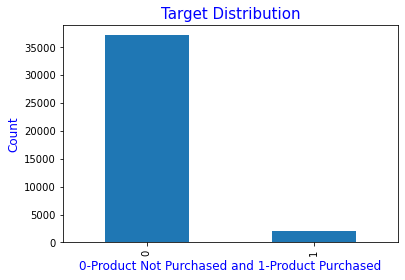

In [29]:
# Lets check distrubution of target variable

# Percentage value counts
print(df_train['buy'].value_counts(normalize=True),'\n')

# Lets plot bar plot for target column
df_train['buy'].value_counts().plot.bar()

# Adding and formatting title
plt.title("Target Distribution", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'blue'})

# Labeling Axes
plt.xlabel("0-Product Not Purchased and 1-Product Purchased", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'blue'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'blue'})

plt.show()

There is very high data imbalace in the dataset. We will take care of this imbalace techniques such as SMOTE.

Lets create **Month** , **weekofyear**, **weekday** and **holiday**

In [14]:
#Lets create new feature such as month, weekday, week of the year
#df_train["weekofyear"] = df_train['created_at'].dt.weekofyear
df_train["month"] = df_train['created_at'].dt.month
# The day of the week with Monday=0, Sunday=6.
df_train["weekday"] = df_train['created_at'].dt.weekday
# Holiday column if day of week is 5 or 6
df_train['holiday'] = df_train["weekday"].apply(lambda x: 'Yes' if x in [5,6] else 'No' )

In [15]:
# top 5 observations
df_train.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,month,weekday,holiday
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0,1,4,No
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0,1,4,No
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0,1,4,No
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,No
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0,1,4,No


In [16]:
# Mapping months
monthDict={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df_train['month'] = df_train['month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

# Mapping weekday
df_train["weekday"] = df_train["weekday"].map({0:'Sun',1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"})
df_train['weekday'].value_counts()

Sun    5672
Sat    5630
Wed    5596
Tue    5580
Thu    5572
Fri    5570
Mon    5541
Name: weekday, dtype: int64

In [17]:
list1 = df_train.columns.to_list()

In [31]:
# Lets check value counts for all variables
for col in list1:
    print(df_train[col].value_counts(normalize=True))

1        0.000026
26111    0.000026
26104    0.000026
26105    0.000026
26106    0.000026
           ...   
13056    0.000026
13057    0.000026
13058    0.000026
13059    0.000026
39161    0.000026
Name: id, Length: 39161, dtype: float64
2021-12-26    0.004622
2021-12-09    0.004596
2021-12-21    0.004571
2021-12-07    0.004571
2021-12-04    0.004545
                ...   
2021-01-07    0.000868
2021-01-14    0.000843
2021-01-06    0.000741
2021-01-22    0.000664
2021-01-01    0.000536
Name: created_at, Length: 365, dtype: float64
6     0.103700
5     0.103675
4     0.102602
3     0.096627
7     0.095912
2     0.089017
8     0.087000
9     0.073185
10    0.061081
11    0.047828
1     0.040678
12    0.037154
13    0.027042
14    0.018232
15    0.011644
16    0.004622
Name: campaign_var_1, dtype: float64
6     0.146677
7     0.139731
5     0.134062
8     0.119762
4     0.107582
9     0.090319
3     0.073619
10    0.058681
2     0.045658
11    0.036005
12    0.019433
1     0.015040
13    

In [19]:
# Impute missing values in 'products_purchased' by '0' considering customer has not bought any product.
df_train['products_purchased'].fillna('0.0', inplace=True)

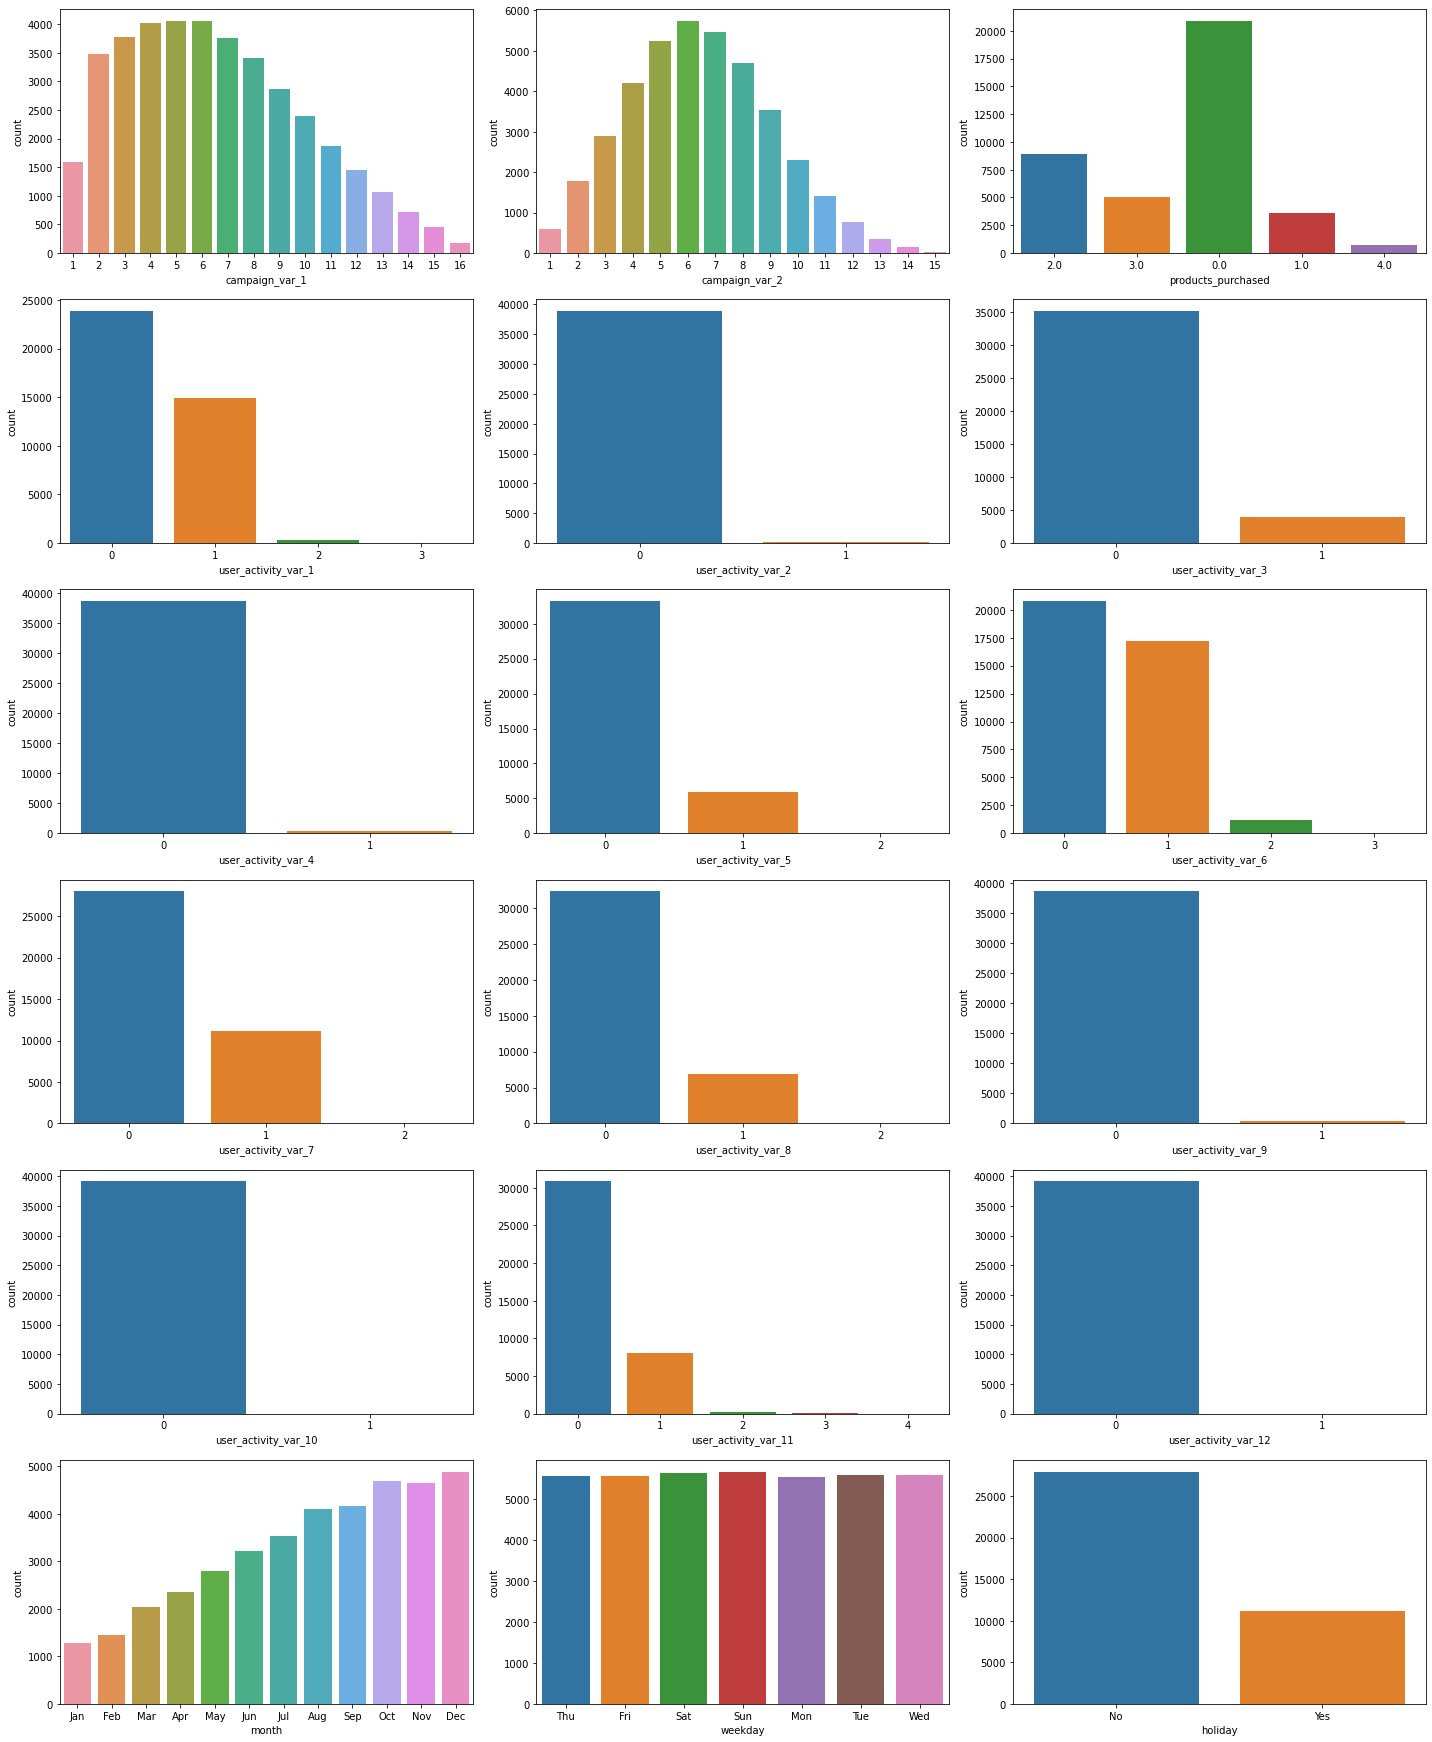

In [30]:
# Create list of categorical variable list.
catvars = ['campaign_var_1',"campaign_var_2",'products_purchased','user_activity_var_1','user_activity_var_2',
           'user_activity_var_3','user_activity_var_4','user_activity_var_5','user_activity_var_6','user_activity_var_7',
          'user_activity_var_8','user_activity_var_9','user_activity_var_10','user_activity_var_11','user_activity_var_12',
          'month','weekday','holiday']

#Box plot 
fig = plt.figure(figsize=(20,40))
i = 1
for vars in catvars:
    plt.subplot(10,3,i)
    sns.countplot(data = df_train, x = vars)
    i = i + 1

fig.tight_layout()
plt.show()

In [32]:
# Statistical varience in the dataset is very low, we are dropping theses variables
drop_cols = ['user_activity_var_12','user_activity_var_10','user_activity_var_9','user_activity_var_4','user_activity_var_2']
df_train.drop(drop_cols, axis=1, inplace=True)

In [ ]:
# Also looking at the value counts and graphs above, few categories have very few values, so we would combine them with the other category

### Bivariate Analysis